In [ ]:
import os
import cv2
import numpy as np

# Function to load and preprocess images from a given directory
def load_and_preprocess_images(dataset_path):
    # Get a list of all subfolders
    subfolders = os.listdir(dataset_path)

    # Initialize empty lists for images and labels
    images = []
    labels = []

    # Iterate through each subfolder
    for subfolder in subfolders:
        # Get the path to the current subfolder
        subfolder_path = os.path.join(dataset_path, subfolder)

        # Get a list of all files in the current subfolder
        files = os.listdir(subfolder_path)

        # Iterate through each file in the current subfolder
        for file in files:
            # Check if the file is an image
            if file.endswith(".jpg") or file.endswith(".png"):
                # Get the path to the current image
                image_path = os.path.join(subfolder_path, file)

                # Read the image
                image = cv2.imread(image_path)

                # Resize the image
                image = cv2.resize(image, (224, 224))

                # Convert the image to a NumPy array
                image = np.array(image)

                # Append the original image and its label to the lists
                images.append(image)
                labels.append(subfolder)

    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Preprocess the images(Normalize)
    preprocessed_images = images / 255.0

    return preprocessed_images, labels

# Define the paths to the datasets
negative_dataset_path = "/content/drive/MyDrive/sickle cell uganda 2024-20240415T165932Z-001/sickle cell uganda 2024/Negative"
positive_dataset_path = "/content/drive/MyDrive/sickle cell uganda 2024-20240415T165932Z-001/sickle cell uganda 2024/Positive"

# Load and preprocess images from both datasets
negative_images, negative_labels = load_and_preprocess_images(negative_dataset_path)
positive_images, positive_labels = load_and_preprocess_images(positive_dataset_path)

# Combine the two datasets
combined_images = np.concatenate((negative_images, positive_images), axis=0)
combined_labels = np.concatenate((negative_labels, positive_labels), axis=0)

# Check if the number of images and labels match
print("Number of images:", len(combined_images))
print("Number of labels:", len(combined_labels))


Number of images: 1053
Number of labels: 1053


In [ ]:
# prompt: combined_images = np.concatenate((negative_images, positive_images), axis=0) store this in directory

# Import the necessary libraries
import os

# Define the directory where you want to store the combined images
target_directory = "/content/drive/MyDrive/Combined"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Iterate through the combined images and save them to the target directory
for i, image in enumerate(combined_images):
    # Generate a unique filename for each image
    filename = f"combined_image_{i}.jpg"

    # Construct the full path for the image
    image_path = os.path.join(target_directory, filename)

    # Save the image to the target directory
    cv2.imwrite(image_path, image)



Framework Definition

Found 1053 files belonging to 2 classes.
Using 843 files for training.
Found 1053 files belonging to 2 classes.
Using 210 files for validation.


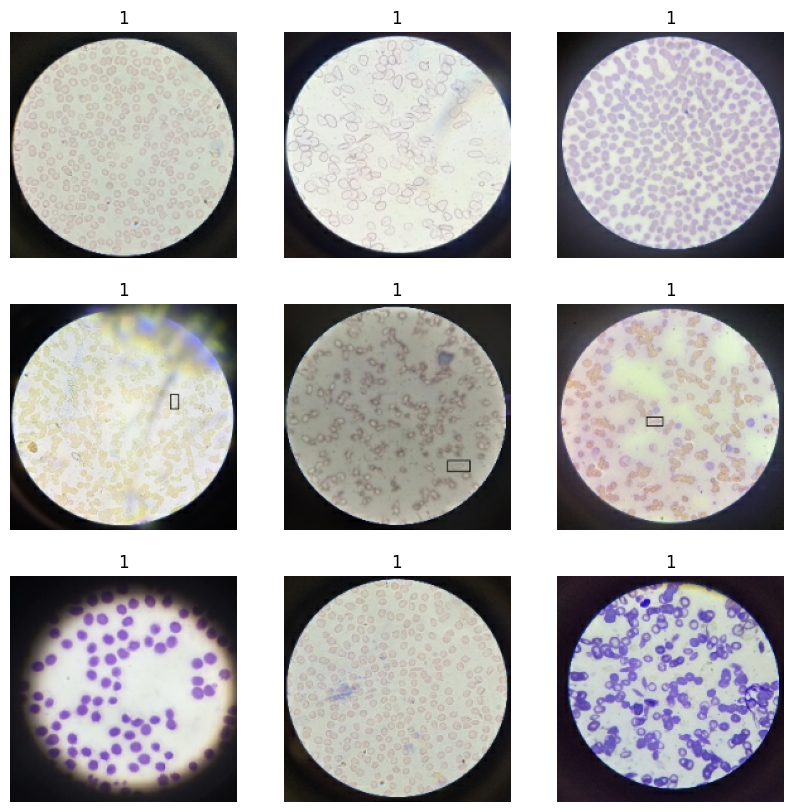

In [ ]:
import os
import cv2
import numpy as np

# Function to load and preprocess images from a given directory
def load_and_preprocess_images(dataset_path):
    # Get a list of all subfolders
    subfolders = os.listdir(dataset_path)

    # Initialize empty lists for images and labels
    images = []
    labels = []

    # Iterate through each subfolder
    for subfolder in subfolders:
        # Get the path to the current subfolder
        subfolder_path = os.path.join(dataset_path, subfolder)

        # Get a list of all files in the current subfolder
        files = os.listdir(subfolder_path)

        # Iterate through each file in the current subfolder
        for file in files:
            # Check if the file is an image
            if file.endswith(".jpg") or file.endswith(".png"):
                # Get the path to the current image
                image_path = os.path.join(subfolder_path, file)

                # Read the image
                image = cv2.imread(image_path)

                # Resize the image
                image = cv2.resize(image, (224, 224))

                # Convert the image to a NumPy array
                image = np.array(image)

                # Append the original image and its label to the lists
                images.append(image)
                labels.append(subfolder)

    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Preprocess the images (Normalize)
    preprocessed_images = images / 255.0

    return preprocessed_images, labels

# Define the paths to the datasets
negative_dataset_path = "/content/drive/MyDrive/sickle cell uganda 2024-20240415T165932Z-001/sickle cell uganda 2024/Negative"
positive_dataset_path = "/content/drive/MyDrive/sickle cell uganda 2024-20240415T165932Z-001/sickle cell uganda 2024/Positive"

# Load and preprocess images from both datasets
negative_images, negative_labels = load_and_preprocess_images(negative_dataset_path)
positive_images, positive_labels = load_and_preprocess_images(positive_dataset_path)

# Combine the two datasets
combined_images = np.concatenate((negative_images, positive_images), axis=0)
combined_labels = np.concatenate((negative_labels, positive_labels), axis=0)

# Define the directory where you want to store the combined images
target_directory = "/content/drive/MyDrive/Combined"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Create subdirectories for each class
negative_class_dir = os.path.join(target_directory, "Negative")
positive_class_dir = os.path.join(target_directory, "Positive")

if not os.path.exists(negative_class_dir):
    os.makedirs(negative_class_dir)

if not os.path.exists(positive_class_dir):
    os.makedirs(positive_class_dir)

# Iterate through the combined images and save them to the target directory
for i, (image, label) in enumerate(zip(combined_images, combined_labels)):
    # Generate a unique filename for each image
    filename = f"combined_image_{i}.jpg"

    # Construct the full path for the image based on its label
    if label == "Negative":
        image_path = os.path.join(negative_class_dir, filename)
    else:
        image_path = os.path.join(positive_class_dir, filename)

    # Save the image to the target directory
    cv2.imwrite(image_path, image * 255)  # Multiply by 255 to restore pixel values

# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the dataset
train_dataset = image_dataset_from_directory(
    target_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    target_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

# Now you can proceed with the rest of your pipeline
# Example: visualize some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()


In [ ]:
# prompt: execute code for feature extaction

import numpy as np
# Feature extraction

# Define the feature extraction model
feature_extraction_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
    pooling="avg",
)

# Extract features from the training and validation datasets
train_features = feature_extraction_model.predict(train_dataset)
validation_features = feature_extraction_model.predict(validation_dataset)

# Convert the features to NumPy arrays
train_features = np.array(train_features)
validation_features = np.array(validation_features)

# Print the shapes of the feature arrays
print(f"Train features shape: {train_features.shape}")
print(f"Validation features shape: {validation_features.shape}")


7/7 [==============================] - 11s 2s/step
Train features shape: (843, 1280)
Validation features shape: (210, 1280)


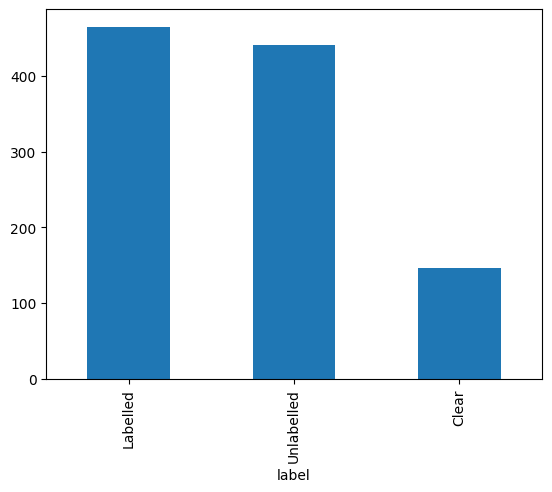

Image shape: (224, 224, 3)
Mean pixel value: 0.5967596240132245
Standard deviation of pixel values: 0.3148447096656257


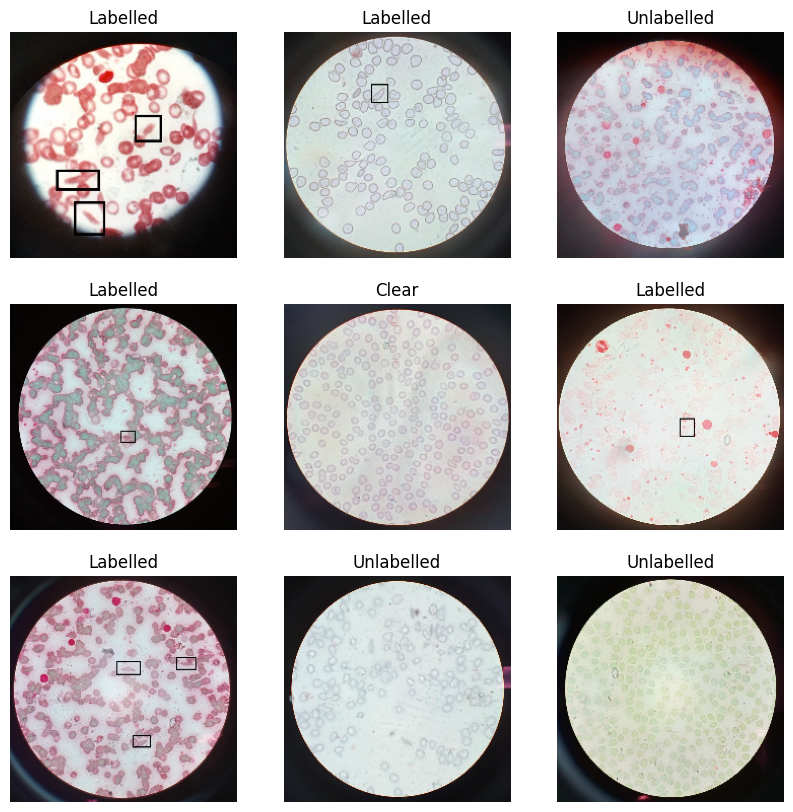

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.DataFrame({
    "label": combined_labels,
    "image_path": [os.path.join(target_directory, f"combined_image_{i}.jpg") for i in range(len(combined_images))]
})

# Get some descriptive statistics about the dataset
df.describe()

# Get the number of images for each label
df["label"].value_counts()

# Visualize the distribution of labels
df["label"].value_counts().plot(kind="bar")
plt.show()

# Get the shape of the images
image_shape = combined_images[0].shape
print(f"Image shape: {image_shape}")

# Calculate the mean and standard deviation of the pixel values
mean = np.mean(combined_images)
std = np.std(combined_images)
print(f"Mean pixel value: {mean}")
print(f"Standard deviation of pixel values: {std}")

# Visualize some random images
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(0, len(combined_images))
    plt.subplot(3, 3, i + 1)
    plt.imshow(combined_images[idx])
    plt.title(combined_labels[idx])
    plt.axis("off")
plt.show()


In [ ]:
#Augmentation
from tensorflow.keras import layers, models
#data_augmentation = tf.keras.Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
  #layers.RandomRotation(0.2),
#])
#
## Apply data augmentation to the training dataset
#train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


Building the model(CNNs)

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalize pixel values to [0, 1]
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])


In [ ]:
# prompt: i would like to build a model with transfer learning models instead atleast 5

# Define a list of pre-trained models to choose from
pretrained_models = [

    tf.keras.applications.VGG19,
    tf.keras.applications.ResNet50,

    tf.keras.applications.InceptionV3,
    tf.keras.applications.Xception,
]

# Loop through each pre-trained model and build a model with transfer learning
for model_class in pretrained_models:
    # Create a new model instance
    model = model_class(weights="imagenet", include_top=False)

    # Freeze the pre-trained layers
    model.trainable = False

    # Add a global average pooling layer
    model = tf.keras.Sequential([
        model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1, activation="sigmoid"),  # For binary classification
    ])

    # Compile the model
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    # Train the model
    history = model.fit(train_dataset, validation_data=validation_dataset, epochs=3)

    # Evaluate the model
    _, accuracy = model.evaluate(validation_dataset)
    print(f"Model: {model_class.__name__}, Accuracy: {accuracy:.2f}")



80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/3
27/27 [==============================] - 581s 21s/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 5.0763e-05 - val_accuracy: 1.0000
Epoch 2/3
27/27 [==============================] - 537s 20s/step - loss: 9.8943e-06 - accuracy: 1.0000 - val_loss: 2.0955e-05 - val_accuracy: 1.0000
Epoch 3/3
7/7 [==============================] - 106s 15s/step - loss: 1.9405e-05 - accuracy: 1.0000
Model: VGG19, Accuracy: 1.00
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/3
27/27 [==============================] - 164s 6s/step - loss: 0.1228 - accuracy: 0.9383 - val_loss: 9.1300e-04 - val_accuracy: 1.0000
Epoch 2/3
27/27 [==============================] - 167s 6s/step - loss: 5.4024e-04 - accuracy: 1.0000 - val_loss: 4.6309e-04 - val_accuracy: 1.0000
Epoch 3/3
7/7 [==============================] - 31s 4s/step - loss: 4.1778e-04 - accuracy: 1.0000
Model: ResNet50, Accuracy: 1.00
87910968/87910968 [====

In [ ]:
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Ensure combined_images is a numpy array
combined_images = np.array(combined_images)

# Extract HOG features
hog_features = [hog(image, channel_axis=-1) for image in combined_images]

# Create an SVM model
model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
model.fit(hog_features, combined_labels)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

In [ ]:
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, hinge_loss

# Ensure combined_images is a numpy array
combined_images = np.array(combined_images)

# Extract HOG features
hog_features = [hog(image, channel_axis=-1) for image in combined_images]

# Create an SVM model
model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

# Fit the model
model.fit(hog_features, combined_labels)

# Predict the labels for the training data
train_predictions = model.predict(hog_features)

# Calculate training accuracy
train_accuracy = accuracy_score(combined_labels, train_predictions)
print(f"Train accuracy: {train_accuracy:.2f}")

# Calculate training loss using hinge loss
# Note: Hinge loss calculation requires the raw decision function output
svm_decision_function = model.decision_function(hog_features)
train_loss = hinge_loss(combined_labels, svm_decision_function)
print(f"Train loss: {train_loss:.2f}")


Train accuracy: 1.00
Train loss: 0.00


In [ ]:
# prompt: compute confusin matrix for the svm

from sklearn.metrics import confusion_matrix

# Predict the labels for the training data
train_predictions = model.predict(hog_features)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(combined_labels, train_predictions)

# Print the confusion matrix
print(f"Confusion matrix:\n {confusion_matrix}")


Confusion matrix:
 [[147   0   0]
 [  0 464   1]
 [  0   1 440]]


In [ ]:

from sklearn.metrics import classification_report

# Predict the labels for the training data
train_predictions = model.predict(hog_features)

# Generate a classification report
report = classification_report(combined_labels, train_predictions)

# Print the classification report
print(f"Classification Report:\n{report}")


Classification Report:
              precision    recall  f1-score   support

       Clear       1.00      1.00      1.00       147
    Labelled       1.00      1.00      1.00       465
  Unlabelled       1.00      1.00      1.00       441

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Flatten the images for KNN
flat_images = [image.flatten() for image in combined_images]

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(flat_images, combined_labels)


KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog
import numpy as np

# Extract HOG features
hog_features = [hog(image, channel_axis=-1) for image in combined_images]

# Convert HOG features to numpy array
hog_features = np.array(hog_features)

# Create a Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM cross-validation
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_cv_scores = cross_val_score(svm_model, hog_features, combined_labels, cv=skf, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std():.2f}")

# KNN cross-validation
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_cv_scores = cross_val_score(knn_model, hog_features, combined_labels, cv=skf, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {knn_cv_scores.mean():.2f} ± {knn_cv_scores.std():.2f}")


SVM Cross-Validation Accuracy: 0.81 ± 0.03
KNN Cross-Validation Accuracy: 0.33 ± 0.01


Model Compilation

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])


Model Training

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
)


Epoch 1/5
27/27 [==============================] - 507s 18s/step - loss: 0.1839 - accuracy: 0.9383 - val_loss: 3.7567e-04 - val_accuracy: 1.0000
Epoch 2/5
27/27 [==============================] - 489s 18s/step - loss: 3.6729e-04 - accuracy: 1.0000 - val_loss: 9.8535e-05 - val_accuracy: 1.0000
Epoch 3/5
27/27 [==============================] - 552s 21s/step - loss: 2.4934e-04 - accuracy: 1.0000 - val_loss: 8.3108e-05 - val_accuracy: 1.0000
Epoch 4/5
27/27 [==============================] - 536s 20s/step - loss: 2.2096e-04 - accuracy: 1.0000 - val_loss: 7.5749e-05 - val_accuracy: 1.0000
Epoch 5/5
27/27 [==============================] - 480s 18s/step - loss: 1.9595e-04 - accuracy: 1.0000 - val_loss: 7.0363e-05 - val_accuracy: 1.0000


Model Evaluation

In [ ]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

# Get predictions from the model
y_pred = model.predict(validation_dataset)

# Convert the predictions to binary values
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Get the true labels
# Iterate through the validation dataset to extract labels
y_true = []
for _, label in validation_dataset:  # Assuming your dataset yields (data, label) pairs
    y_true.extend(label.numpy())  # Convert tensor to numpy array if necessary

# Calculate the performance metrics
precision = precision_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
accuracy = accuracy_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)

# Print the performance metrics
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")

7/7 [==============================] - 92s 12s/step
Precision: 1.00
F1 Score: 0.99
Accuracy: 0.98
Recall: 0.98


Training Results

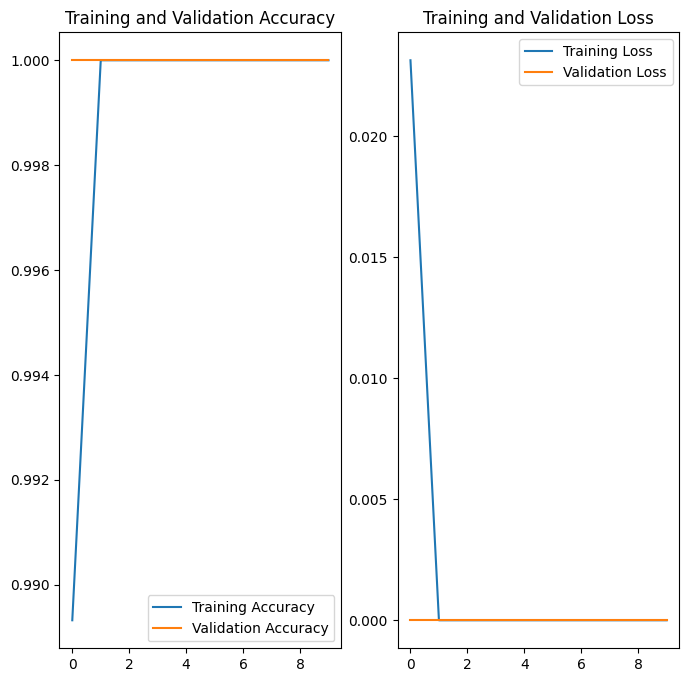

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
